# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [ ]:
# TODO: niekorzystanie ze zmiennych globalnych typu gios_url_ids wewnątrz funkcji w load_data.py

In [ ]:
# W celu automatycznego przeładowywania modułów
%load_ext autoreload
%autoreload 2

In [2]:
import scripts.load_data as ld
import scripts.data_analysis as da
import scripts.visualizations as vis

## Zadanie 1

#### Wczytanie metadanych

In [ ]:
metadata = ld.get_metadata()
metadata

,Kod stacji,Stary kod stacji,Miejscowość
0,DsBialka,NaN,Białka
1,DsBielGrot,NaN,Bielawa
2,DsBogatFrancMOB,DsBogatMob,Bogatynia
3,DsBogChop,NaN,Bogatynia
4,DsBogZatonieMob,NaN,Bogatynia
...,...,...,...
1129,ZpSzczPilsud,"ZpSzczecin002, ZpSzczPils02",Szczecin
1130,ZpSzczWSSEEnerg,NaN,Szczecin
1131,ZpSzczWSSESped6,NaN,Szczecin
1132,ZpWalWalczWSSE,NaN,Wałcz


In [4]:
# Słowniki mapujące stare kody na nowe i kody stacji na miast
old_to_new_code, code_to_city = ld.get_code_mappings(metadata)
old_to_new_code

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga': 'KpBydFieldor',
 'KpBydBerling': 'KpB

In [5]:
code_to_city

{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

### Pobranie i preprocessing danych

In [14]:
dfs = []
# w 2015 trzeba poprawić daty
chosen_years = [2015]#, 2018, 2021, 2024]
for year in chosen_years:
    print(f'ROK {year}')
    df = ld.download_and_preprocess_data(year,
                                         code_to_city, 
                                         old_to_new_code, 
                                         header_index=1 if year != 2015 else 0)
    print(df.head(3))
    dfs.append(df)

ROK 2015


ConnectionError: HTTPSConnectionPool(host='powietrze.gios.gov.pl', port=443): Max retries exceeded with url: /pjp/archives/downloadFile/236 (Caused by NameResolutionError("HTTPSConnection(host='powietrze.gios.gov.pl', port=443): Failed to resolve 'powietrze.gios.gov.pl' ([Errno -3] Temporary failure in name resolution)"))

### Sanity checks

In [13]:
for df, year in zip(dfs, chosen_years):
    print(f'{year}')
    print(
        f'Liczba dni: {df['Data'].dt.date.nunique()}'
    )
    print(f'Min: {df['Data'].min()}')
    print(f'Max: {df['Data'].max()}')
    print(f'Liczba kolumn: {len(df.columns)}')

2015
Liczba dni: 366
Min: 2015-01-01 01:00:00
Max: 2016-01-01 00:00:43.790000
Liczba kolumn: 45
2018
Liczba dni: 365
Min: 2018-01-01 01:00:00
Max: 2018-12-31 23:59:59
Liczba kolumn: 54
2021
Liczba dni: 365
Min: 2021-01-01 01:00:00
Max: 2021-12-31 23:59:59
Liczba kolumn: 91
2024
Liczba dni: 366
Min: 2024-01-01 01:00:00
Max: 2024-12-31 23:59:59
Liczba kolumn: 99


In [ ]:
# Złączenie danych z trzech lat
df = ld.join_data_on_common_stations(dfs)
df

/home/maja/polish-air-quality-trends/scripts/load_data.py:148: PerformanceWarning: indexing past lexsort depth may impact performance.
  if col not in df.columns:
/home/maja/polish-air-quality-trends/scripts/load_data.py:149: PerformanceWarning: indexing past lexsort depth may impact performance.
  df[col] = pd.NA
/home/maja/polish-air-quality-trends/scripts/load_data.py:148: PerformanceWarning: indexing past lexsort depth may impact performance.
  if col not in df.columns:
/home/maja/polish-air-quality-trends/scripts/load_data.py:149: PerformanceWarning: indexing past lexsort depth may impact performance.
  df[col] = pd.NA
/home/maja/polish-air-quality-trends/scripts/load_data.py:148: PerformanceWarning: indexing past lexsort depth may impact performance.
  if col not in df.columns:
/home/maja/polish-air-quality-trends/scripts/load_data.py:149: PerformanceWarning: indexing past lexsort depth may impact performance.
  df[col] = pd.NA
/home/maja/polish-air-quality-trends/scripts/load_da

In [120]:
data_path = 'data/pm25_gios_2015_2018_2021_2024.csv'
df.to_csv(data_path, index=False)

In [121]:
# Kod do wczytywania danych z pliku
df = ld.read_data_from_csv(data_path)
df.head(5)

/home/maja/polish-air-quality-trends/scripts/load_data.py:159: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,47,49,51,59,67,73,75,78,80,81,82,84,86,89,91,92,93,95,96,97,99,103,104,109,110,113,116,118,119,120,121,122,128,132,133,134,136,137,140,141,142,144,149,150,153,156,157,158,159,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=[0,1])


Miejscowość                     Data      Nieznane                \
Kod stacji                                   PM2.5       PM2.5.1   
0                                NaN  DsJelGorOgin  DsWrocAlWisn   
1            2015-01-01 01:00:00.000       151.112            78   
2            2015-01-01 02:00:00.000       262.566            42   
3            2015-01-01 03:00:00.005        222.83            27   
4            2015-01-01 04:00:00.010       210.767            24   

Miejscowość                                                          \
Kod stacji        PM2.5.2       PM2.5.3       PM2.5.4       PM2.5.5   
0            DsWrocWybCon  KpBydPlPozna  KpBydWarszaw  KpToruDziewu   
1                      50          29.2          95.5        27.352   
2                 33.8244          27.1          86.1       78.0064   
3                 28.7215           7.9          23.8       21.1056   
4                 20.6891           7.1          15.9       16.9088   

Miejscowość                                            ...         Końskie  \
Kod stacji        PM2.5.6       PM2.5.7       PM2.5.8  ... SkKonsGranatMOB   
0            LbLubObywate  LdLodzCzerni  LdLodzGdansk  ...             NaN   
1                 71.1012         59.73           NaN  ...             NaN   
2                 95.2582        185.92           NaN  ...             NaN   
3                 49.5078         54.25           NaN  ...             NaN   
4                 60.8468         50.15           NaN  ...             NaN   

Miejscowość        Płock     Przemyśl     Warszawa       Gdańsk       Elbląg  \
Kod stacji  MzPlocMiReja PkPrzemGrunw MzWarAlNiepo PmGdaWyzwole WmElbBazynsk   
0                    NaN          NaN          NaN          NaN          NaN   
1                    NaN          NaN          NaN          NaN          NaN   
2                    NaN          NaN          NaN          NaN          NaN   
3                    NaN          NaN          NaN          NaN          NaN   
4                    NaN          NaN          NaN          NaN          NaN   

Miejscowość        Racibórz      Rzeszów         Świecie         Żary  
Kod stacji  SlRaciborzWPMOB PkRzeszStarz KpSwiecJPawlMOB LuZarySzyman  
0                       NaN          NaN             NaN          NaN  
1                       NaN          NaN             NaN          NaN  
2                       NaN          NaN             NaN          NaN  
3                       NaN          NaN             NaN          NaN  
4                       NaN          NaN             NaN          NaN  

[5 rows x 166 columns]

## Zadanie 2
#### Średnie miesięczne + trend dla miast


In [122]:
monthly_means = da.get_monthly_means_for_stations(df)

print("Średnie miesięczne dla każdej stacji:")
monthly_means

Średnie miesięczne dla każdej stacji:


Miejscowość           Nieznane                                              \
Kod stacji               PM2.5    PM2.5.1    PM2.5.2    PM2.5.3    PM2.5.4   
(Rok, ) (Miesiąc, )                                                          
2015    1.0          24.507304  33.006201  27.962502  21.108772  25.956648   
        2.0          41.776451  45.860358  42.205272  45.477252  49.939606   
        3.0          28.692497  36.037396  32.625274  33.092926  24.413016   
        4.0          12.297509  19.816697  15.099344  16.320839        NaN   
        5.0           8.736347  18.531897  13.362499  12.837611  12.671467   
        6.0           7.776698  18.220119  11.708792   9.985994   9.773838   
        7.0           6.892805  18.911283  12.162589  10.173546   9.677311   
        8.0          11.126114  25.139124  18.302455  14.702786  13.784091   
        9.0           7.104765  19.982083  12.305856  14.358276  13.949158   
        10.0         23.685006  43.767947  32.500288  35.187083  35.429713   
        11.0         25.713361  49.795508  43.764785  30.641975  35.994251   
        12.0         22.881914  34.356382  27.005352  21.850279  30.301812   
2018    1.0                NaN        NaN        NaN        NaN        NaN   
        2.0                NaN        NaN        NaN        NaN        NaN   
        3.0                NaN        NaN        NaN        NaN        NaN   
        4.0                NaN        NaN        NaN        NaN        NaN   
        5.0                NaN        NaN        NaN        NaN        NaN   
        6.0                NaN        NaN        NaN        NaN        NaN   
        7.0                NaN        NaN        NaN        NaN        NaN   
        8.0                NaN        NaN        NaN        NaN        NaN   
        9.0                NaN        NaN        NaN        NaN        NaN   
        10.0               NaN        NaN        NaN        NaN        NaN   
        11.0               NaN        NaN        NaN        NaN        NaN   
        12.0               NaN        NaN        NaN        NaN        NaN   
2021    1.0                NaN        NaN        NaN        NaN        NaN   
        2.0                NaN        NaN        NaN        NaN        NaN   
        3.0                NaN        NaN        NaN        NaN        NaN   
        4.0                NaN        NaN        NaN        NaN        NaN   
        5.0                NaN        NaN        NaN        NaN        NaN   
        6.0                NaN        NaN        NaN        NaN        NaN   
        7.0                NaN        NaN        NaN        NaN        NaN   
        8.0                NaN        NaN        NaN        NaN        NaN   
        9.0                NaN        NaN        NaN        NaN        NaN   
        10.0               NaN        NaN        NaN        NaN        NaN   
        11.0               NaN        NaN        NaN        NaN        NaN   
        12.0               NaN        NaN        NaN        NaN        NaN   
2024    1.0                NaN        NaN        NaN        NaN        NaN   
        2.0                NaN        NaN        NaN        NaN        NaN   
        3.0                NaN        NaN        NaN        NaN        NaN   
        4.0                NaN        NaN        NaN        NaN        NaN   
        5.0                NaN        NaN        NaN        NaN        NaN   
        6.0                NaN        NaN        NaN        NaN        NaN   
        7.0                NaN        NaN        NaN        NaN        NaN   
        8.0                NaN        NaN        NaN        NaN        NaN   
        9.0                NaN        NaN        NaN        NaN        NaN   
        10.0               NaN        NaN        NaN        NaN        NaN   
        11.0               NaN        NaN        NaN        NaN        NaN   
        12.0               NaN        NaN        NaN        NaN        NaN   

Miejscowość          

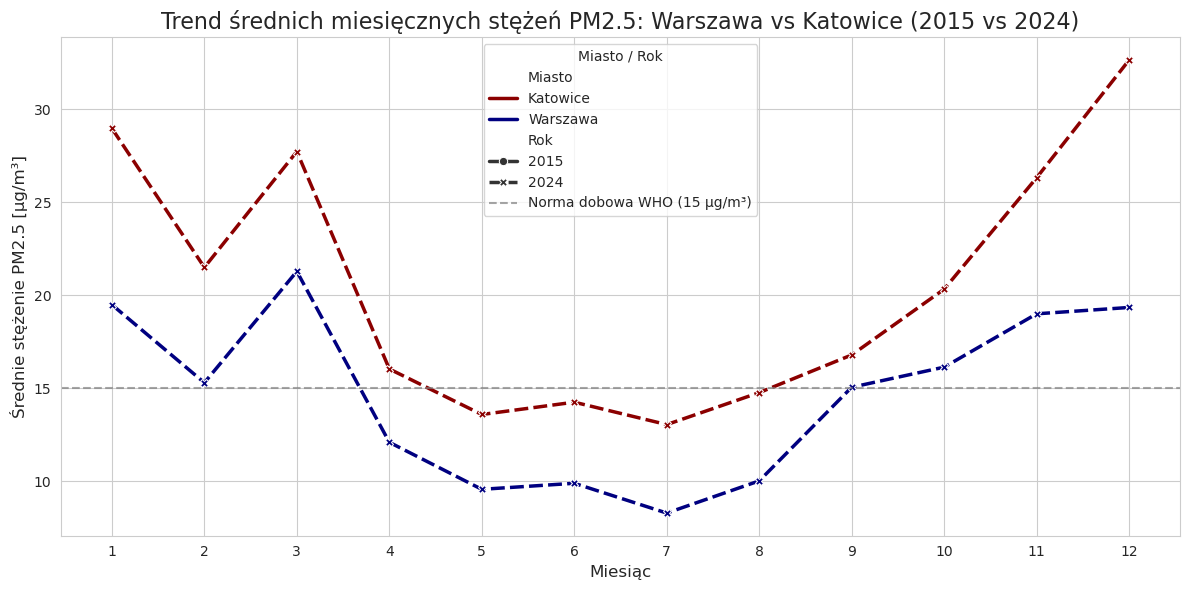

In [123]:
# Wykres trendów dla Katowic i Warszawy w latach 2015 i 2024
chosen_years = [2015, 2024]
chosen_cities = ['Warszawa', 'Katowice']

df_plot = da.get_chosen_monthly_means(df, chosen_years, chosen_cities)
vis.plot_trends_for_chosen_cities(df_plot, chosen_years, chosen_cities)

Wykres przedstawia średnie miesięczne stężenie pyłu PM2.5 dla Warszawy i Katowic, porównując sytuację z roku 2014 (linie przerywane) z rokiem 2024 (linie ciągłe). Dane zostały uśrednione dla wszystkich stacji pomiarowych w obrębie danego miasta.

Wyraźnie widać wysokie stężenia w miesiącach zimowych (styczeń, luty, grudzień) i niskie w letnich. Wskazuje to na kluczową rolę sezonu grzewczego w emisji zanieczyszczeń.

Zarówno w Warszawie, jak i w Katowicach, linie dla roku 2024 znajdują się znacząco niżej niż dla roku 2014 (szczególnie w miesiącach zimowych). Oznacza to znaczną poprawę jakości powietrza w ciągu ostatniej dekady.

Katowice generalnie wykazują wyższe stężenia PM2.5 niż Warszawa, szczególnie w miesiącach zimowych roku 2014, co wynika ze specyfiki regionu i źródeł ogrzewania. Jednak w 2024 roku różnica ta w miesiącach letnich niemal zanika, a w zimowych jest znacznie mniejsza niż dekadę wcześniej.

## Zadanie 3
#### Uśrednienie danych po stacjach w miejscowości i miesiącu w każdym roku

In [124]:
df_means = da.get_monthly_means_for_cities(df)
df_means.head(5)

Miejscowość,Rok,Miesiąc,Augustów,Biała,Białystok,Bielsko-Biała,Biskupiec,Boguchwała,Borsukowizna,Brzeg,...,Złoty Potok,Łagów,Łask,Łuków,Łódź,Środa Śląska,Świecie,Żary,Żyrardów,Żywiec
0,2015,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Heatmapy średnich miesięcznych

/usr/lib/python3/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/lib/python3/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


KeyboardInterrupt: 

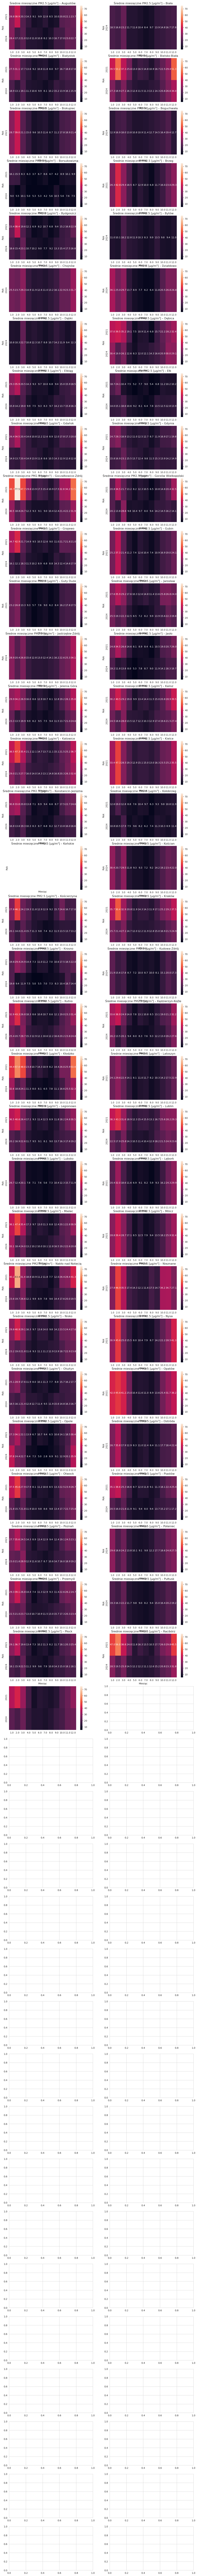

In [125]:
vis.plot_heatmaps_for_cities(df_means)

Patrząc na powyższe wykresy, możemy zauważyć podobny trend we wszystkich raportowanych miastach, a mianowicie najwyższe stężenia drobnego pyłu w sezonie grzewczym, przede wszystkim w lutym i listopadzie/grudniu. Nie jest to zaskakujące, jako że jednym z głównych żródeł PM2.5 w Polsce jest spalanie paliw stałych w domowych piecach i kotłach [[Polski Alarm Smogowy](https://polskialarmsmogowy.pl/smog/skad-sie-bierze-smog/)]. 

Widzimy jednak obiecującą tendecję, jaką jest znaczne obniżenie stężenia PM2.5 w każdym z miast na przeciągu lat 2014-2024. W 2014 roku w każdym z przedstawionych miast zaobserwowane było kilkukrotne – od około dwukrotnego w Gdańsku do pięciokrotnego w Krakowie – przekroczenie dopuszczalnego przez WHO stężenia 15 µg/m³. W 2024 roku, ta wartość nadal była przekraczana w każdym z miast, jendak maksymalne średnie miesięczne stężenie w tym roku wahało się pomiędzy 20.4 (Warszawa) a 36.1 µg/m³ (Zgierz – miasto, w którym poprawa jest najmniejsza). Pokazuje to, że wdrożenie działania antysmogowe wdrażane w ostatniej dekadzie przynoszą realne efekty.

## Zadanie 4
#### Dni z przekroczeniem normy (WHO)

In [126]:
yearly_counts = da.get_who_norm_exceeding_days(df)
selected_stations = da.get_max_and_min_k_stations(yearly_counts, chosen_year=2024, k=3)

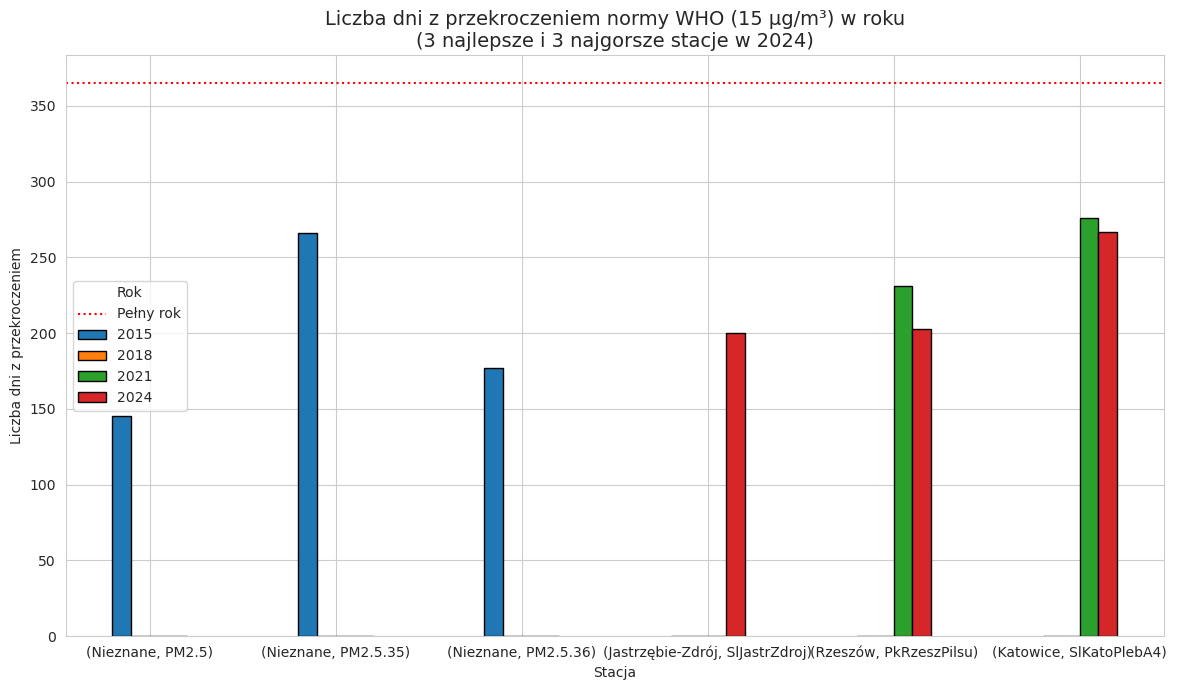

Tabela z wynikami:


('Data', '')                 2015  2018  2021  2024
Miejscowość Kod stacji                             
Nieznane    PM2.5             145     0     0     0
            PM2.5.1           310     0     0     0
            PM2.5.2           199     0     0     0
            PM2.5.3           190     0     0     0
            PM2.5.4           163     0     0     0
...                           ...   ...   ...   ...
Elbląg      WmElbBazynsk        0     0   137   100
Racibórz    SlRaciborzWPMOB     0     0   260   186
Rzeszów     PkRzeszStarz        0     0     0    92
Świecie     KpSwiecJPawlMOB     0     0     0    92
Żary        LuZarySzyman        0     0   105    83

[163 rows x 4 columns]

In [127]:
vis.plot_who_exceeding_days(selected_stations)

print("Tabela z wynikami:")
display(yearly_counts[[2015, 2018, 2021, 2024]])

Analizując wykres przedstawiający liczbę dni z przekroczeniem normy WHO (15 µg/m³) w 3 najlepszych i 3 najgorszych stacjach, można zaobserwować dominującą tendencję malejącą w zanieczyszczeniu powietrza na przestrzeni lat 2014, 2019 i 2024. 

Największą bezwzględną poprawę, mierzoną największym spadkiem liczby dni z przekroczeniami, zanotowały stacje o najgorszej jakości powietrza (Kraków, Katowice), gdzie w 2014 roku przekroczenia sięgały odpowiednio 350 i 255 dni. Mimo ogólnej poprawy, w 2024 roku wciąż utrzymują się znaczące dysproporcje, ponieważ stacje w Krakowie, Zgierzu i Katowicach (jako najgorsze) nadal notują ponad 170 dni z przekroczeniem normy, co stanowi prawie połowę roku. 

Z drugiej strony, stacje najlepsze, takie jak Szczecin, osiągnęły duży sukces, redukując liczbę dni smogowych w 2024 roku do około 70, w porównaniu do ponad 175 dni w 2014. Kontrast pomiędzy stacjami o najlepszej i najgorszej jakości powietrza w 2024 roku (np. Szczecin vs. Kraków) wyraźnie wskazuje na potrzebę skupienia interwencji w najbardziej zanieczyszczonych lokalizacjach.

COMMENTWydaje mi się, że mogłam źle pobrać dane, albo inne ids niż są rzeczywiście wproadzić. Niektóre tabele się rozjeżdżają, ale możliwe, że to właśnie przez te błędne dane :(